In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Reading the data

In [3]:
data = pd.read_csv('train_data.csv')
data.shape

(792, 17)

# KNN Model with k=3

In [4]:
cols = ['PassengerId', 'Sex', 'Age', 'Fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Family_size', 'Title_1', 'Title_2', 'Title_3',
       'Title_4', 'Emb_1', 'Emb_2', 'Emb_3']
y = data['Survived']
x = data[cols]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

y_pred =knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5504201680672269


# Finding Otimum K by cross-validation

In [5]:
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())



# Visualizing All the K values
    

The optimal number of neighbors is 49


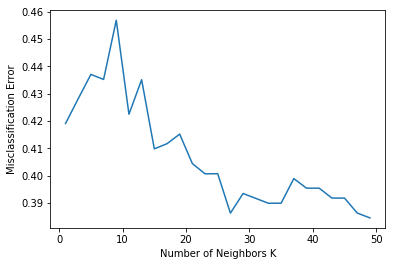

In [6]:
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

# KNN with optimum value of K

In [7]:
knn1 = KNeighborsClassifier(n_neighbors = 49)
# Fit the classifier to the data
knn1.fit(X_train,y_train)

y_pred =knn1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5672268907563025


#### Below are the accuracies for various models I have used:
#### 1. Logistic Regression : 82%
#### 2. Decision Tree : 78%
#### 3. K Nearest Neighbor: 57%

#### comapring the accuracies, we can say that for this datasest - Logistic regression performs the best and KNN the worst.